<a href="https://colab.research.google.com/github/GabyPaolaING/Machine-Learning/blob/main/CLASIFICACI%C3%93N_k_Nearest_Neighbors_(kNN)_EN_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASIFICACIÓN k-Nearest Neighbors (kNN) EN PYTHON

##1.1 Fundamentos de la técnica

El algoritmo k-Nearest Neighbors (kNN) es un método de clasificación supervisada que asigna a una nueva muestra la clase más común entre sus k vecinos más cercanos en el conjunto de entrenamiento.

Características principales:


*   Es no paramétrico, no asume una forma específica para los datos.
*   Se basa en la distancia entre los puntos (usualmente euclidiana).
*  Es un aprendizaje perezoso (lazy learning), ya que no genera un modelo durante el entrenamiento.

Ventajas:

* Sencillo de entender e implementar.
*  Funciona bien con fronteras no lineales.

Desventajas:
*Costoso computacionalmente con grandes volúmenes de datos.
* Sensible a la escala de las variables y a ruido en los datos.



##1.2 Modelo Matemático

Sea un conjunto de datos de entrenamiento:

$$D = \{(x_i, y_i)\}_{i=1}^n, \quad x_i \in \mathbb{R}^d, \quad y_i \in Clases$$

Para un nuevo punto $x$:

1. Se calcula la distancia entre $x$ y cada $x_i$ mediante la métrica Euclidiana:

$$d(x, x_i) = \sqrt{\sum_{j=1}^d (x_j - x_{i,j})^2}$$

2. Se seleccionan los $k$ vecinos más cercanos.

3. La clase predicha $\hat{y}$ es la más frecuente entre esos vecinos:

$$\hat{y} = \text{mode}(\{y_i \; | \; x_i \in V_k(x)\})$$

Donde $V_k(x)$ representa el conjunto de los $k$ vecinos más cercanos a $x$.




## 1.3 Librerías y funciones empleadas

Para implementar el algoritmo k-Nearest Neighbors (kNN) en Python, se utilizan principalmente las librerías **scikit-learn**, **pandas**, **numpy** y **matplotlib**, que permiten el manejo de datos, la creación del modelo y la visualización de resultados.

**Librerías:**

- **pandas:** se utiliza para cargar y manipular los datos en estructuras tipo DataFrame.
- **numpy:** facilita operaciones matemáticas y vectoriales.
- **matplotlib.pyplot:** permite graficar y visualizar la distribución de los datos.
- **sklearn.neighbors:** contiene la clase `KNeighborsClassifier`, que implementa el modelo kNN.
- **sklearn.metrics:** provee funciones para evaluar el rendimiento del modelo (matriz de confusión, precisión, etc.).
- **sklearn.model_selection:** incluye la función `train_test_split` para dividir los datos en conjuntos de entrenamiento y prueba.

**Principales clases y funciones utilizadas:**

- `KNeighborsClassifier(n_neighbors=k)`: crea el modelo de clasificación kNN.  
  - **Parámetros más comunes:**
    - `n_neighbors`: número de vecinos a considerar.
    - `metric`: tipo de distancia (por defecto, euclidiana).
    - `weights`: define cómo se ponderan los vecinos (‘uniform’ o ‘distance’).

- `fit(X_train, y_train)`: entrena el modelo con los datos de entrada (`X_train`) y sus etiquetas (`y_train`).

- `predict(X_test)`: predice las clases de los datos nuevos o de prueba.

- `train_test_split(X, y, test_size=0.3, random_state=0)`: divide los datos en conjuntos de entrenamiento y prueba.

- `confusion_matrix(y_test, y_pred)`: genera la matriz de confusión.

- `classification_report(y_test, y_pred)`: muestra métricas como precisión (precision), exhaustividad (recall) y puntuación F1.

- `accuracy_score(y_test, y_pred)`: calcula la exactitud total del modelo.

Estas herramientas permiten construir un flujo de trabajo completo: desde la preparación de los datos hasta la evaluación del modelo.

##1.4 Pipeline

##Preprocesamiento y carga del dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
sns.set(style="whitegrid")

In [5]:
# Cargar dataset de ejemplo
iris = load_iris(as_frame=True)
df = iris.frame.copy()
df['target'] = iris.target
X = df[iris.feature_names]
y = df['target']

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2) Análisis estadístico y gráfico de dispersión

In [6]:
# Estadísticas básicas
display(df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Verificar valores faltantes
print(df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


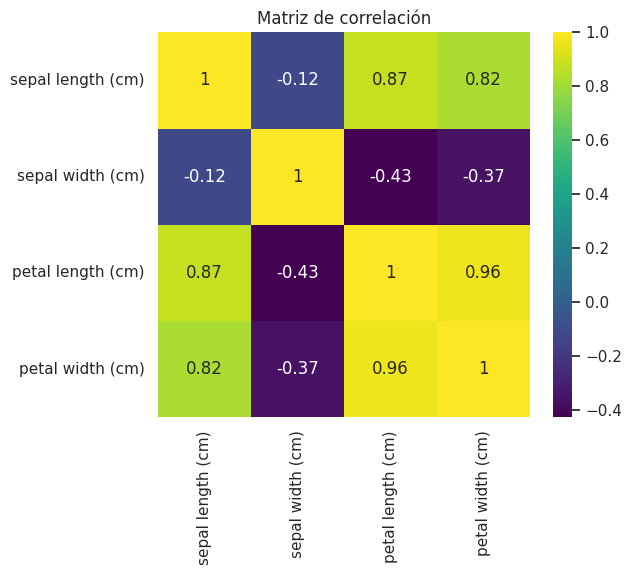

In [8]:
# Correlación
plt.figure(figsize=(6,5))
sns.heatmap(X.corr(), annot=True, cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

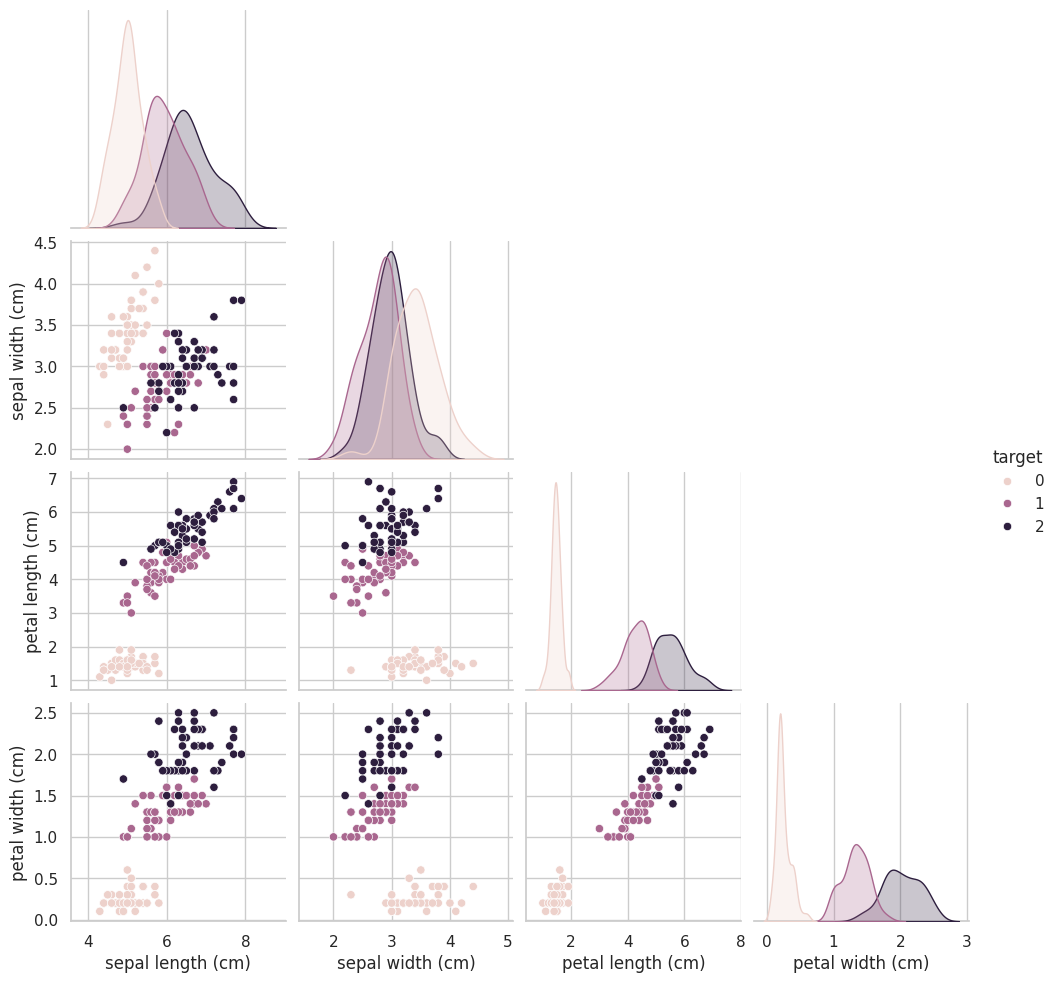

In [9]:
# Scatter plot (pairplot)
sns.pairplot(df, vars=iris.feature_names, hue="target", corner=True)
plt.show()

##3) Selección de características (Feature Engineering)

In [10]:
# Selección de mejores variables (SelectKBest)
selector = SelectKBest(score_func=f_classif, k=2)
selector.fit(X, y)

scores = pd.Series(selector.scores_, index=X.columns)
print("Puntaje de cada variable:")
print(scores.sort_values(ascending=False))

best_two = scores.sort_values(ascending=False).index[:2].tolist()
print("Mejores dos features:", best_two)


Puntaje de cada variable:
petal length (cm)    1180.161182
petal width (cm)      960.007147
sepal length (cm)     119.264502
sepal width (cm)       49.160040
dtype: float64
Mejores dos features: ['petal length (cm)', 'petal width (cm)']


##4) Entrenamiento del modelo kNN

In [11]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [12]:
# Crear pipeline (escalado + modelo)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

In [13]:
# Búsqueda de parámetros (Grid Search)
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan"]
}

In [14]:
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Mejor score:", grid.best_score_)
print("Mejores parámetros:", grid.best_params_)

best_model = grid.best_estimator_

Mejor score: 0.9549407114624506
Mejores parámetros: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}


##5) Función de predicción personalizada

In [15]:
def predict_pattern(model, pattern, feature_names=None):
    arr = np.array(pattern).reshape(1, -1)
    if feature_names and len(pattern) != len(feature_names):
        raise ValueError("El número de valores no coincide con las variables")
    return model.predict(arr)[0]

ejemplo = X_test.iloc[0].values
pred = predict_pattern(best_model, ejemplo, X.columns.tolist())
print("Clase real:", int(y_test.iloc[0]))
print("Clase predicha:", int(pred))


Clase real: 0
Clase predicha: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 6) Evaluación del modelo

Métricas empleadas:

* Matriz de Confusión: muestra aciertos y errores por clase.

* Accuracy: proporción de aciertos totales.

In [16]:
y_pred = best_model.predict(X_test)


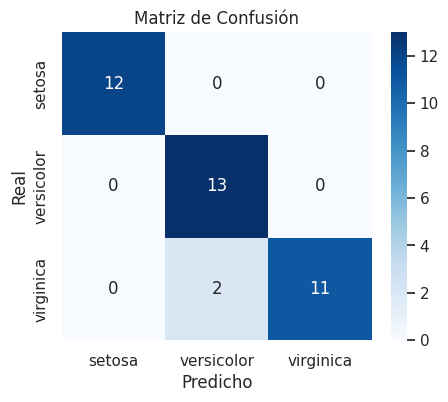

In [17]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [18]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


In [19]:
# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



##Referencias

Díaz, R. (2020, mayo 12). Algoritmo KNN - cómo funciona y ejemplos en Python. The Machine Learners. https://www.themachinelearners.com/algoritmo-knn/

Daniel. (2021, diciembre 28). ¿Qué es el algoritmo KNN? DataScientest. https://datascientest.com/es/que-es-el-algoritmo-knn

